### Aim of the chapter
1. to understand the roles of array and tensors in broadcasting and using them expressively

2. We will learn stohastic gradient descent by updating the weights automatically

3. We will also describe the math the neural network is doinf

4. Role of mini batches

In [149]:
!pip install fastbook
import fastbook
try:
  fastbook.setup_book()
except Exception as e:
  print(e)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:



mount failed: invalid oauth code


In [150]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

### Creating classifier so that it recognises a 3 or a 7

In [151]:
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path

In [152]:
path.ls()

(#3) [Path('labels.csv'),Path('valid'),Path('train')]

In [153]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [154]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
sevens

(#6265) [Path('train/7/10002.png'),Path('train/7/1001.png'),Path('train/7/10014.png'),Path('train/7/10019.png'),Path('train/7/10039.png'),Path('train/7/10046.png'),Path('train/7/10050.png'),Path('train/7/10063.png'),Path('train/7/10077.png'),Path('train/7/10086.png')...]

In [155]:
im3_path = threes[4]
im3 = Image.open(im3_path)
im3

In [156]:
array(im3)[4:10, 4:10]

array([[  0,   0,   0,   5,  60, 136],
       [  0,   0,  25, 152, 253, 253],
       [  0,   0, 135, 225, 244, 253],
       [  0,   0,   0,  30, 149,  78],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0]], dtype=uint8)

In [157]:
tensor(Image.open(sevens[4]))[4:10, 4:10]

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=torch.uint8)

In [158]:
#hide_output
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[3:15,3:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,5,60,136,136,147,254,255,199,111,18,9,0,0,0,0
2,0,0,0,25,152,253,253,253,253,253,253,253,253,253,124,0,0,0,0
3,0,0,0,135,225,244,253,202,200,181,164,216,253,253,211,151,0,0,0
4,0,0,0,0,30,149,78,3,0,0,0,20,134,253,253,224,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,28,206,253,253,224,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,78,253,253,253,224,0,0,0
7,0,0,0,0,0,0,0,0,0,0,5,99,234,253,253,224,0,0,0
8,0,0,0,0,0,0,0,0,14,142,220,219,236,253,253,240,121,7,0
9,0,0,0,0,0,0,0,0,24,253,253,253,253,235,233,253,253,185,53


There's one guaranteed way to fail, and that's to stop trying. We've seen that the only consistent trait amongst every fast.ai student that's gone on to be a world-class practitioner is that they are all very tenacious.

Here we are using the python imaging library (PIL) which is the widely used Python package for opening, manipulating and viewing images.

to see the image we need to convert it into a Numpy array or a pytorch tensor

In [159]:
array(im3)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   5,  60, 136, 136, 147, 254, 255, 199, 111,  18,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  25, 152, 253, 253, 253, 253, 253, 253, 253, 253, 253, 124,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 135, 225, 244, 253, 202, 200, 181, 164, 216, 253, 253, 211, 151,   0

We can use dataframe to convert into a ddata frame then color code as a gradient which shows clearly how the image is created from pixel values

In [160]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t)
df.style.background_gradient('ocean')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,5,60,136,136,147,254,255,199,111,18,9,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,25,152,253,253,253,253,253,253,253,253,253,124,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,135,225,244,253,202,200,181,164,216,253,253,211,151,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,30,149,78,3,0,0,0,20,134,253,253,224,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,206,253,253,224,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78,253,253,253,224,0,0,0,0,0,0,0,0,0


In [161]:
array(im3)[18:22,15:20]

# one way to identify is to look for regions that will always have 3 or seven and then use it
# to calculate

array([[253, 253, 253, 253, 212],
       [253, 253, 253, 234,  31],
       [253, 172, 216, 112,   0],
       [253,  47,  25,   0,   0]], dtype=uint8)

In [162]:
im7_path = sevens[7]
im7 =  Image.open(im7_path)

array(im7)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

In [163]:
im7_d = pd.DataFrame(tensor(im7))

im7_d.style.background_gradient("Pastel2_r")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,8,101,160,159,198,254,254,71,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,27,94,180,253,254,253,253,253,253,140,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,57,236,253,248,208,150,101,56,115,253,136,0,0,0,0,0,0,0


In [164]:
# for i in im7_d:
#   print(im7_d[i])

Trying to calculate the group averages

In [165]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors), len(seven_tensors)

(6131, 6265)

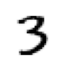

In [166]:
show_image(three_tensors[1])

for every pixel position we want to compute the average over all the images of 
that pixel. To do this we first combine all the images. The most common way to describe such a tensor is to call it a rank 3 tensor. Unsurprisingly it comes with a function called stack thatwe can use.

some operations in pytorch we need to case to integer and float types. Since we be needing this later, we will also cast our stacked tensor to float

Generally when images are floats the picel values are expected to be between 0 and also devide by 255
Since we'll be needing this later, we'll also cast our stacked tensor to float now. Casting in PyTorch is as simple as typing the name of the type you wish to cast to, and treating it as a method.

In [167]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

Rank is the number of axes in a tensor while shape is the size of each axis of tensor

In [168]:
len(stacked_threes.shape)

3

In [169]:
stacked_threes.ndim

3

finally we will take mean of all tensors by taking th e mean along dimension 0 of stacked, rank three it means we will calculate mean over all the mean images

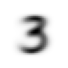

In [170]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

In [171]:
type(mean3)

torch.Tensor

In [172]:
df = pd.DataFrame(mean3)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('coolwarm_r')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000073,0.000196,0.000234,0.000193,0.000276,0.000262,0.000294,0.000284,0.000157,0.000049,0.000006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000016,0.000487,0.000773,0.001447,0.002979,0.005649,0.009518,0.015693,0.021113,0.024280,0.025964,0.024268,0.020875,0.017108,0.011642,0.007044,0.003994,0.001495,0.000329,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000024,0.000033,0.000156,0.001400,0.005785,0.013664,0.030111,0.055401,0.090316,0.137247,0.183566,0.221279,0.246549,0.249719,0.235358,0.198716,0.150844,0.105427,0.064754,0.032829,0.013352,0.004597,0.000393,0.000002,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000058,0.001520,0.008891,0.027837,0.061064,0.112706,0.186884,0.280246,0.382974,0.480248,0.558778,0.613243,0.623296,0.597718,0.528352,0.421002,0.305758,0.203470,0.117423,0.053793,0.016992,0.003462,0.000259,0.000000,0.000000,0.000000
6,0.000000,0.000007,0.000301,0.005817,0.024498,0.059899,0.120375,0.207547,0.319395,0.435470,0.544472,0.627645,0.685044,0.723960,0.744895,0.744635,0.705014,0.608753,0.479167,0.339493,0.213218,0.108683,0.037335,0.007908,0.000823,0.000000,0.000000,0.000000
7,0.000000,0.000324,0.000454,0.009741,0.037895,0.082921,0.153821,0.241572,0.337672,0.426819,0.491617,0.528419,0.544753,0.558834,0.586414,0.627511,0.651261,0.621129,0.528498,0.407529,0.270252,0.144118,0.053465,0.011405,0.001049,0.000000,0.000000,0.000000
8,0.000000,0.000126,0.000540,0.011943,0.040899,0.078775,0.134423,0.194570,0.250744,0.294887,0.316930,0.317467,0.311333,0.321824,0.366342,0.452059,0.537601,0.570685,0.526008,0.417370,0.277698,0.147913,0.056850,0.011186,0.000565,0.000000,0.000000,0.000000
9,0.000000,0.000135,0.000646,0.009146,0.029371,0.054969,0.089482,0.119549,0.141732,0.155845,0.161737,0.161483,0.169576,0.205845,0.292122,0.418712,0.530470,0.574464,0.516992,0.388451,0.243504,0.119843,0.044328,0.008707,0.000116,0.000040,0.000000,0.000000


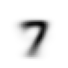

In [173]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

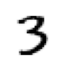

In [174]:
# lets try to classify following image
a_3 = stacked_threes[1]
show_image(a_3)

In [175]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [176]:
mean3.shape, a_3.shape

(torch.Size([28, 28]), torch.Size([28, 28]))

In [177]:
dist_7_abs = (a_3 - mean3).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr


(tensor(0.1114), tensor(0.3021))

In [178]:
# pytorch gives the loss function
F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3, mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [179]:
F.l1_loss(a_3.float(), mean3), F.mse_loss(a_3, mean3).sqrt()

(tensor(0.1114), tensor(0.2021))

Here mse stands for mean squared error, and l1 refers to the standard mathematical jargon for mean absolute value (in math it's called the L1 norm).
: Intuitively, the difference between L1 norm and mean squared error (MSE) is that the latter will penalize bigger mistakes more heavily than the former (and be more lenient with small mistakes).


In [180]:
# creating a tensor
data = [[12,3],[35,6]]
arr = array(data)
tns = tensor(data)

In [181]:
tns

tensor([[12,  3],
        [35,  6]])

In [182]:
arr

array([[12,  3],
       [35,  6]])

In [183]:
tns + 1

tensor([[13,  4],
        [36,  7]])

In [184]:

tns.type()

'torch.LongTensor'

In [185]:
tns * 1.5

tensor([[18.0000,  4.5000],
        [52.5000,  9.0000]])

Broadcasting metrics

In [186]:
(path/'valid'/'3').ls()

(#1010) [Path('valid/3/2534.png'),Path('valid/3/933.png'),Path('valid/3/3746.png'),Path('valid/3/6811.png'),Path('valid/3/8660.png'),Path('valid/3/2431.png'),Path('valid/3/3715.png'),Path('valid/3/6801.png'),Path('valid/3/3947.png'),Path('valid/3/3824.png')...]

In [187]:
# creating a validation set

valid_3_tens = torch.stack([tensor(Image.open(o))for o in (path/'valid'/'3').ls()])
valid_3_tns = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()]).float()/255
valid_3_tens.shape, valid_7_tens.shape
# valid_3_tens and valid_7_tens are good validation tensor

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [188]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

Take another look at our function mnist_distance, and you'll see we have there the subtraction (a-b). The magic trick is that PyTorch, when it tries to perform a simple subtraction operation between two tensors of different ranks, will use broadcasting. That is, it will automatically expand the tensor with the smaller rank to have the same size as the one with the larger rank. Broadcasting is an important capability that makes tensor code much easier to write.

After broadcasting so the two argument tensors have the same rank, PyTorch applies its usual logic for two tensors of the same rank: it performs the operation on each corresponding element of the two tensors, and returns the tensor result

In [189]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([33.8411, 29.5034, 26.2890,  ..., 44.0454, 19.8570, 39.0440]),
 torch.Size([1010]))

In [190]:
tensor(1,2,3) + tensor(1)
# is the same as tensor(1,2,3) tensor(1,2,3)

tensor([2, 3, 4])

In [191]:
(valid_3_tens - mean3).shape

torch.Size([1010, 28, 28])

PyTorch doesn't actually copy mean3 1,010 times. It pretends it were a tensor of that shape, but doesn't actually allocate any additional memory
It does the whole calculation in C (or, if you're using a GPU, in CUDA, the equivalent of C on the GPU), tens of thousands of times faster than pure Python (up to millions of times faster on a GPU!).

Finally, our function calls mean((-1,-2)). The tuple (-1,-2) represents a range of axes. In Python, -1 refers to the last element, and -2 refers to the second-to-last. So in this case, this tells PyTorch that we want to take the mean ranging over the values indexed by the last two axes of the tensor. The last two axes are the horizontal and vertical dimensions of an image. After taking the mean over the last two axes, we are left with just the first tensor axis, which indexes over our images, which is why our final size was (1010). In other words, for every image, we averaged the intensity of all the pixels in that image.

In [192]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [193]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [194]:
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s)/2

(tensor(0.9436), tensor(0.9854), tensor(0.9645))

lets use SGD because learning

Instead of trying to find the similarity between an image and an "ideal image," we could instead look at each individual pixel and come up with a set of weights for each one, such that the highest weights are associated with those pixels most likely to be black for a particular category. For instance, pixels toward the bottom right are not very likely to be activated for a 7, so they should have a low weight for a 7, but they are likely to be activated for an 8, so they should have a high weight for an 8. 

In [195]:
def pr_eight(x,w):
   (x*w).sum()
## a function to measure probability i fwight with weights

Here we are assuming that x is the image, represented as a vector—in other words, with all of the rows stacked up end to end into a single long line. And we are assuming that the weights are a vector w. If we have this function, then we just need some way to update the weights to make them a little bit better. With such an approach, we can repeat that step a number of times, making the weights better and better, until they are as good as we can make them.

We want to find the specific values for the vector w that causes the result of our function to be high for those images that are actually 8s, and low for those images that are not. Searching for the best vector w is a way to search for the best function for recognising 8s.

Initialize the weights.
For each image, use these weights to predict whether it appears to be a 3 or a 7.
Based on these predictions, calculate how good the model is (its loss).
Calculate the gradient, which measures for each weight, how changing that weight would change the loss
Step (that is, change) all the weights based on that calculation.
Go back to the step 2, and repeat the process.
Iterate until you decide to stop the training process (for instance, because the model is good enough or you don't want to wait any longer).

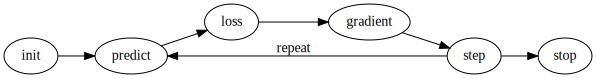

In [196]:
#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

Initialize:: We initialize the parameters to random values. This may sound surprising. There are certainly other choices we could make, such as initializing them to the percentage of times that pixel is activated for that category—but since we already know that we have a routine to improve these weights, it turns out that just starting with random weights works perfectly well.
Loss:: This is what Samuel referred to when he spoke of testing the effectiveness of any current weight assignment in terms of actual performance. We need some function that will return a number that is small if the performance of the model is good (the standard approach is to treat a small loss as good, and a large loss as bad, although this is just a convention).
Step:: A simple way to figure out whether a weight should be increased a bit, or decreased a bit, would be just to try it: increase the weight by a small amount, and see if the loss goes up or down. Once you find the correct direction, you could then change that amount by a bit more, and a bit less, until you find an amount that works well. However, this is slow! As we will see, the magic of calculus allows us to directly figure out in which direction, and by roughly how much, to change each weight, without having to try all these small changes. The way to do this is by calculating gradients. This is just a performance optimization, we would get exactly the same results by using the slower manual process as well.
Stop:: Once we've decided how many epochs to train the model for (a few suggestions for this were given in the earlier list), we apply that decision. This is where that decision is applied. For our digit classifier, we would keep training until the accuracy of the model started getting worse, or we ran out of time.

In [197]:
# trying this on a simplar model : a quadratic model

def f(x): return x**2

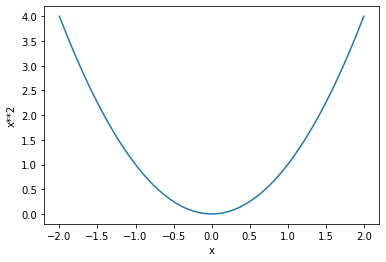

In [198]:
plot_function(f, 'x', 'x**2')

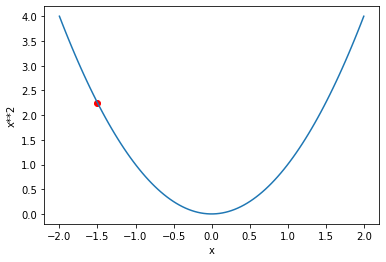

In [199]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

### Calculating gradients

For any function we can calculate irs derivative. The derivative is another function. It calculates the change, rather than the value. For instance, the derivative of the quadratic function at the value 3 tells us how rapidly the function changes at the value 3. More specifically, you may recall that gradient is defined as rise/run, that is, the change in the value of the function, divided by the change in the value of the parameter. When we know how our function will change, then we know what we need to do to make it smaller. This is the key to machine learning: having a way to change the parameters of a function to make it smaller. Calculus provides us with a computational shortcut, the derivative, which lets us directly calculate the gradients of our functions.

One important thing to be aware of is that our function has lots of weights that we need to adjust, so when we calculate the derivative we won't get back one number, but lots of them—a gradient for every weight. But there is nothing mathematically tricky here; you can calculate the derivative with respect to one weight, and treat all the other ones as constant, then repeat that for each other weight. This is how all of the gradients are calculated, for every weight.


pytorch has a gradient function

In [200]:
xt =  tensor(3.)
print(xt)

tensor(3.)


In [201]:
xt = xt.requires_grad_()

Notice the special method requires_grad_? That's the magical incantation we use to tell PyTorch that we want to calculate gradients with respect to that variable at that value. It is essentially tagging the variable, so PyTorch will remember to keep track of how to compute gradients of the other, direct calculations on it that you will ask for.

a: This API might throw you off if you're coming from math or physics. In those contexts the "gradient" of a function is just another function (i.e., its derivative), so you might expect gradient-related APIs to give you a new function. But in deep learning, "gradients" usually means the value of a function's derivative at a particular argument value. 

In [202]:
# we will now use xt to find yt

yt = f(xt)

In [203]:
yt

tensor(9., grad_fn=<PowBackward0>)

In [204]:
# and we tell pytorch to calculate the gradient fro us
yt.backward()

The "backward" here refers to backpropagation, which is the name given to the process of calculating the derivative of each layer. We'll see how this is done exactly in chapter <>, when we calculate the gradients of a deep neural net from scratch. This is called the "backward pass" of the network, as opposed to the "forward pass," which is where the activations are calculated. Life would probably be easier if backward was just called calculate_grad, but deep learning folks really do like to add jargon everywhere they can!

In [205]:
xt.grad

## after back propagation the value is six

tensor(6.)

In [206]:
xt = tensor([3., 4., 10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [207]:
def f(x): return (x**2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [208]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

The gradients only tell us the slope of our function, they don't actually tell us exactly how far to adjust the parameters. But it gives us some idea of how far; if the slope is very large, then that may suggest that we have more adjustments to do, whereas if the slope is very small, that may suggest that we are close to the optimal value.

### stepping with learning rate

Deciding how to change our parameters based on the values of the gradients is an important part of the deep learning process. Nearly all approaches start with the basic idea of multiplying the gradient by some small number, called the learning rate (LR). The learning rate is often a number between 0.001 and 0.1, although it could be anything. Often, people select a learning rate just by trying a few, and finding which results in the best model after training (we'll show you a better approach later in this book, called the learning rate finder). Once you've picked a learning rate, you can adjust your parameters using this simple function

In [209]:
#w -= gradient(w) * lr

# END TO END

Let's start with a simple, synthetic, example model. Imagine you were measuring the speed of a roller coaster as it went over the top of a hump. It would start fast, and then get slower as it went up the hill; it would be slowest at the top, and it would then speed up again as it went downhill. You want to build a model of how the speed changes over time.

In [210]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

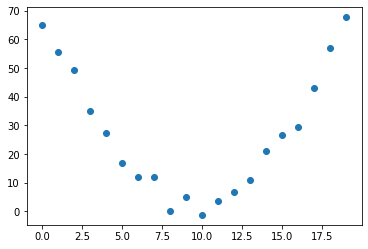

In [211]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [212]:
# we assume that the function is quadratic

def f(t, params):
  a,b,c = params
  return a*(t**2) + (b*t) + c

In [213]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [214]:
# random initialisation
params = torch.randn(3).requires_grad_()

In [215]:
orig_params = params.clone()


In [216]:
params

tensor([0.9134, 0.7106, 0.3361], requires_grad=True)

In [217]:
preds = f(time, params)

In [218]:
def show_preds(preds, ax = None):
  if ax is None:
    ax = plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, to_np(preds), color='red')
  ax.set_ylim(-300, 100)

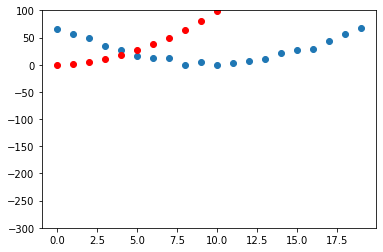

In [219]:
show_preds(preds)

In [220]:
loss = mse(preds, speed)
loss

tensor(19569.0586, grad_fn=<MeanBackward0>)

In [221]:
loss.backward()
# we calculated the best params through calling backward for the loss function
params.grad

tensor([46139.1133,  2967.5859,   185.4277])

In [222]:
params.grad * 1e-5

tensor([0.4614, 0.0297, 0.0019])

In [223]:
params

tensor([0.9134, 0.7106, 0.3361], requires_grad=True)

In [224]:
# updating the parameters

lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [225]:
preds = f(time, params)
mse(preds, speed)

tensor(4231.2886, grad_fn=<MeanBackward0>)

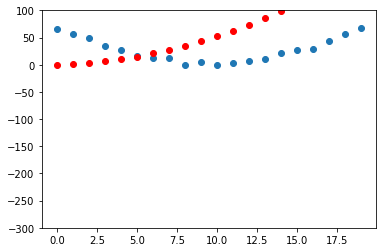

In [226]:
show_preds(preds)

In [227]:
def apply_step(params, prn=True):
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= lr * params.grad.data
  params.grad = None
  if prn: print(loss.item())
  return preds

In [228]:
for i in range(10):
  apply_step(params)

4231.28857421875
1328.911376953125
779.690185546875
675.758056640625
656.0881958007812
652.36328125
651.6558227539062
651.5189208984375
651.4902954101562
651.482177734375


In [229]:
params = orig_params.detach().requires_grad_()

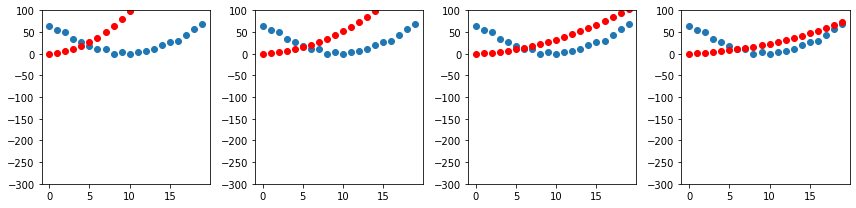

In [230]:
_ , axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

### MNIST loss function

We already have our dependent variables `x`—these are the images themselves. We'll concatenate them all into a single tensor, and also change them from a list of matrices (a rank-3 tensor) to a list of vectors (a rank-2 tensor). We can do this using `view`, which is a PyTorch method that changes the shape of a tensor without changing its contents. `-1` is a special parameter to `view` that means "make this axis as big as necessary to fit all the data":

In [231]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1,28*28)

In [232]:
# labelling
train_y = tensor([1] * len(threes) + [0] *len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

A `Dataset` in PyTorch is required to return a tuple of `(x,y)` when indexed. Python provides a `zip` function which, when combined with `list`, provides a simple way to get this functionality:

In [233]:
dset = list(zip(train_x, train_y))
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [234]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1,28*28)
valid_y = tensor([1] * len(valid_3_tens) + [0] * len(valid_7_tens)).unsqueeze(1)
valid_dset =  list(zip(valid_x, valid_y))

In [235]:
# we need am initially random weight

def init_params(size, std=1.0): 
  return (torch.randn(size)*std).requires_grad_() ## this ensures that backward works

In [236]:
weights = init_params((28 * 28, 1))

In [237]:
bias = init_params(1)


In [238]:
train_x[0].shape

torch.Size([784])

In [239]:
weights.T.shape

torch.Size([1, 784])

In [240]:
(train_x[0] * weights.T).sum() + bias

tensor([-12.2175], grad_fn=<AddBackward0>)

While we could use a Python for loop to calculate the prediction for each image, that would be very slow. Because Python loops don't run on the GPU, and because Python is a slow language for loops in general, we need to represent as much of the computation in a model as possible using higher-level functions.

In this case, there's an extremely convenient mathematical operation that calculates w*x for every row of a matrix—it's called matrix multiplication. <> shows what matrix multiplication looks like.

In [241]:
def linear1(xb): return xb @ weights + bias
preds = linear1(train_x)
preds

tensor([[-12.2175],
        [ -3.6281],
        [ -2.6097],
        ...,
        [ -9.0370],
        [-11.6841],
        [ -2.8518]], grad_fn=<AddBackward0>)

The first element is the same as we calculated before, as we'd expect. This equation, batch@weights + bias, is one of the two fundamental equations of any neural network (the other one is the activation function, which we'll see in a moment).

Let's check our accuracy. To decide if an output represents a 3 or a 7, we can just check whether it's greater than 0, so our accuracy for each item can be calculated (using broadcasting, so no loops!) with:

In [242]:
# how is it working

corrects = (preds>0.0).float() == train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])

In [243]:
corrects.float().mean().item()

0.5287189483642578

In [244]:
weights[0] *= 1.0001
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.5287189483642578

So, we need to choose a loss function. The obvious approach would be to use accuracy, which is our metric, as our loss function as well. In this case, we would calculate our prediction for each image, collect these values to calculate an overall accuracy, and then calculate the gradients of each weight with respect to that overall accuracy.

Unfortunately, we have a significant technical problem here. The gradient of a function is its slope, or its steepness, which can be defined as rise over run—that is, how much the value of the function goes up or down, divided by how much we changed the input. We can write this in mathematically as: (y_new - y_old) / (x_new - x_old). This gives us a good approximation of the gradient when x_new is very similar to x_old, meaning that their difference is very small. But accuracy only changes at all when a prediction changes from a 3 to a 7, or vice versa. The problem is that a small change in weights from x_old to x_new isn't likely to cause any prediction to change, so (y_new - y_old) will almost always be 0. In other words, the gradient is 0 almost everywhere.

A very small change in the value of a weight will often not actually change the accuracy at all. This means it is not useful to use accuracy as a loss function—if we do, most of the time our gradients will actually be 0, and the model will not be able to learn from that number.

S: In mathematical terms, accuracy is a function that is constant almost everywhere (except at the threshold, 0.5), so its derivative is nil almost everywhere (and infinity at the threshold). This then gives gradients that are 0 or infinite, which are useless for updating the model.

Instead, we need a loss function which, when our weights result in slightly better predictions, gives us a slightly better loss. So what does a "slightly better prediction" look like, exactly? Well, in this case, it means that if the correct answer is a 3 the score is a little higher, or if the correct answer is a 7 the score is a little lower.

In [245]:
# Here's a first try at a loss function that measures
# the distance between predictions and targets:

trgts = tensor([1,0,1])
prds = tensor([0.9,0.4,0.2])

In [246]:
def mnist_loss(predictions, targets):
  return torch.where(targets ==1, 1-predictions, predictions).mean()

In [247]:
torch.where(trgts==1, 1-prds, prds)

#his function will measure how distant each prediction is from 1 if it should be 1, and how distant it is from 0 if it should be 0, 
#and then it will take the mean of all those distances.

tensor([0.1000, 0.4000, 0.8000])

In [248]:
mnist_loss(prds, trgts)

tensor(0.4333)

In [249]:
prds[2] = 0
prds
# if we get better prediction...

tensor([0.9000, 0.4000, 0.0000])

In [250]:
mnist_loss(prds, trgts)
# ...the loss actually increased

tensor(0.5000)

mnist loss wants that the prediction is always between 0 and 1
we need to ensure that thats always the case 
and for that we have sigmoid

In [251]:
def sigmoid(x):
  return 1/(1+torch.exp(-x))

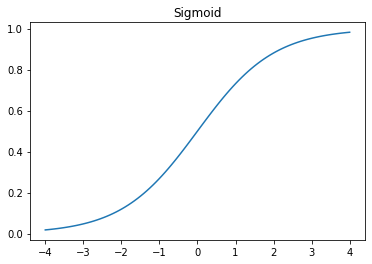

In [252]:
# torch already has an accelerated version
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [253]:
# applying sigmoid in the function first
def mnist_loss(predictions, targets):
  predictions = predictions.sigmoid()
  return torch.where(targets==1, 1-predictions, predictions).mean()

The key difference is that the metric is to drive human understanding and the loss is to drive automated learning. To drive automated learning, the loss must be a function that has a meaningful derivative. It can't have big flat sections and large jumps, but instead must be reasonably smooth. This is why we designed a loss function that would respond to small changes in confidence level. This requirement means that sometimes it does not really reflect exactly what we are trying to achieve, but is rather a compromise between our real goal, and a function that can be optimized using its gradient. The loss function is calculated for each item in our dataset, and then at the end of an epoch the loss values are all averaged and the overall mean is reported for the epoch.

Now that we have a loss function that is suitable for driving SGD, we can consider some of the details involved in the next phase of the learning process, which is to change or update the weights based on the gradients. This is called an optimization step.


In [254]:
coll = range(15)
dl = DataLoader(coll, batch_Size=5, shuffle=True)
list(dl)

[3, 2, 10, 9, 13, 14, 6, 8, 0, 1, 7, 4, 5, 12, 11]

As we saw in our discussion of data augmentation in <>, we get better generalization if we can vary things during training. One simple and effective thing we can vary is what data items we put in each mini-batch. Rather than simply enumerating our dataset in order for every epoch, instead what we normally do is randomly shuffle it on every epoch, before we create mini-batches. PyTorch and fastai provide a class that will do the shuffling and mini-batch collation for you, called DataLoader.

For training a model, we don't just want any Python collection, but a collection containing independent and dependent variables (that is, the inputs and targets of the model). A collection that contains tuples of independent and dependent variables is known in PyTorch as a Dataset. Here's an example of an extremely simple Dataset:



In [255]:
ds = L(enumerate(string.ascii_lowercase))

In [256]:
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

When we pass a Dataset to a DataLoader we will get back many batches which are themselves tuples of tensors representing batches of independent and dependent variables:



In [257]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([ 3, 16, 17,  8,  7,  2]), ('d', 'q', 'r', 'i', 'h', 'c')),
 (tensor([10, 22,  4, 14, 25, 15]), ('k', 'w', 'e', 'o', 'z', 'p')),
 (tensor([ 1, 12, 19,  5,  9, 11]), ('b', 'm', 't', 'f', 'j', 'l')),
 (tensor([ 0, 23, 21, 13, 18, 20]), ('a', 'x', 'v', 'n', 's', 'u')),
 (tensor([ 6, 24]), ('g', 'y'))]

### putting it together

In [258]:
# lets go put together the sgd
# reinitialising the parameters
weights = init_params((28*28,1))
bias = init_params(1)

In [259]:
dset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0

In [260]:
# dataloder from dataset
dl = DataLoader(dset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [261]:
# same for validation set
valid_dl = DataLoader(valid_dset, batch_size=256)

In [262]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [263]:
preds = linear1(batch)
preds

tensor([[ -5.3413],
        [ -5.0673],
        [ -7.7223],
        [-16.4602]], grad_fn=<AddBackward0>)

In [264]:
loss= mnist_loss(preds, batch)
loss

tensor(0.0038, grad_fn=<MeanBackward0>)

In [265]:
# calculating the gradients
loss.backward()
weights.grad.shape, weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(0.0004), tensor([0.0028]))

In [266]:
# putting in a function
def calc_grad(xb, yb, model):
  preds = model(xb)
  loss= mnist_loss(preds, yb)
  loss.backward()

In [267]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-6.0520e-07), tensor([-4.2482e-06]))

In [268]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad


(tensor(-0.0004), tensor([-0.0029]))

In [269]:
# we need to put gradient ot 0 before calling it again

weights.grad.zero_()
bias.grad.zero_() 
# ending with underscore menas that they are put in plave

tensor([0.])

In [270]:
def train_epoch(model, lr, parmas):
  for xb,yb in dl:
    calc_grad(xb, yb, model)
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

In [271]:
# looking at the accuracy 
(preds>0.0).float() == train_y[:4]

tensor([[False],
        [False],
        [False],
        [False]])

In [272]:
def batch_accuracy(xb, yb):
  preds = xb.sigmoid()
  correct = (preds>0.5) == yb
  return correct.float().mean()

In [273]:
def validate_epoch(model):
  accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
  return round(torch.stack(accs).mean().item(), 4)



In [274]:
validate_epoch(linear1)

0.2396

In [275]:
lr = 1.
params = weights, bias
train_epoch(linear1,lr,params)
validate_epoch(linear1)

0.5476

In [276]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.6709 0.8779 0.9276 0.9452 0.9559 0.9598 0.9633 0.9657 0.9686 0.9691 0.9701 0.972 0.9725 0.9735 0.974 0.974 0.975 0.975 0.975 0.9755 

we have optimisers in pytorch right out of the box which we can use

In [277]:
# instead of linear1 we can use nn.Linear and init_params together
linear_model = nn.Linear(28*28,1)

In [278]:
# to get the parameters
w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [279]:
# creating an optimiser
class BasicOptim:
  def __init__(self, params, lr):
    self.params, self.lr = list(params),lr
  
  def step(self, *args, **kwargs):
    for p in self.params:
      p.data -= p.grad.data * self.lr
  
  def zero_grad(self, *args, **kwargs):
    for p in self.params:
      p.grad = None

In [280]:
opt = BasicOptim(linear_model.parameters(), lr)


In [281]:
def train_epoch(model):
  for xb, yb in dl:
    calc_grad(xb, yb, model)
    opt.step()
    opt.zero_grad()

In [282]:
validate_epoch(linear_model)

0.636

In [283]:
# putting it in a training loop
def train_model(model, epochs):
  for i in range(epochs):
    train_epoch(model)
    print(validate_epoch(model), end= ' ')

In [284]:
train_model(linear_model, 20)

0.4932 0.8818 0.8496 0.9179 0.938 0.9541 0.9624 0.9673 0.9692 0.9717 0.9736 0.9751 0.9761 0.9775 0.9785 0.9785 0.979 0.9795 0.98 0.98 

In [285]:
## using SGD class b default

linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.7793 0.8662 0.9204 0.9409 0.955 0.9629 0.9677 0.9687 0.9721 0.9731 0.9741 0.9751 0.977 0.9785 0.9785 0.979 0.98 0.98 0.98 

In [286]:
# fsatai also has a Learner.fit which we can use instead of train_model
# after creating a dataloader
# and creating a learner

dls = DataLoaders(dl ,valid_dl)

In [287]:
# creating a Learner
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [288]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.637316,0.503435,0.495584,00:00
1,0.535380,0.137609,0.867517,00:00
2,0.196272,0.157748,0.843965,00:00
3,0.085917,0.084708,0.917076,00:00
4,0.045204,0.063530,0.938175,00:00
5,0.029305,0.048970,0.952404,00:00
6,0.022777,0.039397,0.961727,00:00
7,0.019883,0.035607,0.965653,00:00
8,0.018422,0.033264,0.968106,00:00
9,0.017548,0.030615,0.971050,00:00


## creating a neural network

 A linear classifier is very constrained in terms of what it can do. To make it a bit more complex (and able to handle more tasks), we need to add something nonlinear between two linear classifiers—this is what gives us a neural network.

Here is the entire definition of a basic neural network:

In [289]:
def simple_net(xb):
  res = xb@w1 + b1
  res = res.max(tensor(0.0))
  res = res@w2 + b2
  return res

That's it! All we have in `simple_net` is two linear classifiers with a `max` function between them.

Here, `w1` and `w2` are weight tensors, and `b1` and `b2` are bias tensors; that is, parameters that are initially randomly initialized, just like we did in the previous section:

In [290]:
w1 = init_params((28*28, 30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

The key point about this is that w1 has 30 output activations (which means that w2 must have 30 input activations, so they match). That means that the first layer can construct 30 different features, each representing some different mix of pixels. You can change that 30 to anything you like, to make the model more or less complex.

That little function res.max(tensor(0.0)) is called a rectified linear unit, also known as ReLU. We think we can all agree that rectified linear unit sounds pretty fancy and complicated... But actually, there's nothing more to it than res.max(tensor(0.0))—in other words, replace every negative number with a zero. This tiny function is also available in PyTorch as F.relu:

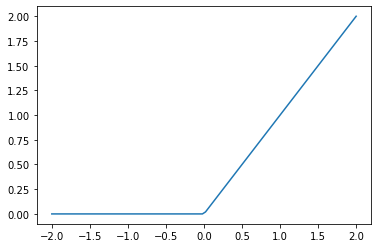

In [291]:
plot_function(F.relu)

Amazingly enough, it can be mathematically proven that this little function can solve any computable problem to an arbitrarily high level of accuracy, if you can find the right parameters for `w1` and `w2` and if you make these matrices big enough. For any arbitrarily wiggly function, we can approximate it as a bunch of lines joined together; to make it closer to the wiggly function, we just have to use shorter lines. This is known as the *universal approximation theorem*. The three lines of code that we have here are known as *layers*. The first and third are known as *linear layers*, and the second line of code is known variously as a *nonlinearity*, or *activation function*.

Just like in the previous section, we can replace this code with something a bit simpler, by taking advantage of PyTorch:

In [292]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

`nn.Sequential` creates a module that will call each of the listed layers or functions in turn.

`nn.ReLU` is a PyTorch module that does exactly the same thing as the `F.relu` function. Most functions that can appear in a model also have identical forms that are modules. Generally, it's just a case of replacing `F` with `nn` and changing the capitalization. When using `nn.Sequential`, PyTorch requires us to use the module version. Since modules are classes, we have to instantiate them, which is why you see `nn.ReLU()` in this example. 

Because `nn.Sequential` is a module, we can get its parameters, which will return a list of all the parameters of all the modules it contains. Let's try it out! As this is a deeper model, we'll use a lower learning rate and a few more epochs.

In [293]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [294]:
learn.fit(40,0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.315723,0.506842,0.513248,00:00
1,0.148462,0.167074,0.841021,00:00
2,0.082008,0.074857,0.931796,00:00
3,0.053849,0.055224,0.949460,00:00
4,0.040825,0.039515,0.964671,00:00
5,0.034172,0.036254,0.967615,00:00
6,0.030343,0.034141,0.969087,00:00
7,0.027848,0.031674,0.972031,00:00
8,0.026044,0.030524,0.973013,00:00
9,0.024645,0.028634,0.974975,00:00


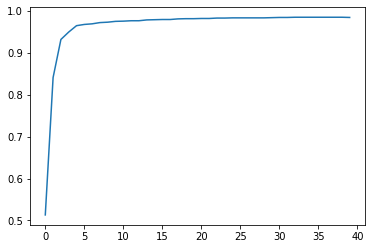

In [295]:
plt.plot(L(learn.recorder.values).itemgot(2))

In [296]:
# final accuracy
learn.recorder.values[-1][2]

0.9842983484268188

There is no need to stop at just two linear layers. We can add as many as we want, as long as we add a nonlinearity between each pair of linear layers. As you will learn, however, the deeper the model gets, the harder it is to optimize the parameters in practice. Later in this book you will learn about some simple but brilliantly effective techniques for training deeper models.

We already know that a single nonlinearity with two linear layers is enough to approximate any function. So why would we use deeper models? The reason is performance. With a deeper model (that is, one with more layers) we do not need to use as many parameters; it turns out that we can use smaller matrices with more layers, and get better results than we would get with larger matrices, and few layers.

That means that we can train the model more quickly, and it will take up less memory. In the 1990s researchers were so focused on the universal approximation theorem that very few were experimenting with more than one nonlinearity. This theoretical but not practical foundation held back the field for years. Some researchers, however, did experiment with deep models, and eventually were able to show that these models could perform much better in practice. Eventually, theoretical results were developed which showed why this happens. Today, it is extremely unusual to find anybody using a neural network with just one nonlinearity.

Here what happens when we train an 18-layer model using the same approach we saw in <<chapter_intro>>:

In [298]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False, loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1,0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.112413,0.015448,0.994603,00:16
